In [1]:
pip install pycaret                  # Installing PyCaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 266kB 8.4MB/s 
     |████████████████████████████████| 66.1MB 55kB/s 
     |████████████████████████████████| 266kB 44.5MB/s 
     |████████████████████████████████| 12.4MB 39.7MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 6.8MB 40.3MB/s 
     |████████████████████████████████| 174kB 52.1MB/s 
     |████████████████████████████████| 1.2MB 45.9MB/s 
     |████████████████████████████████| 1.6MB 44.0MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 604kB 48.1MB/s 
     |████████████████████████████████| 3.1MB 52.0MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 327kB 55.9MB/s 
     |████████████████████████████████| 163kB 53.2MB/s 
     |████████████████████████████████| 1.1MB 53.8MB/s 


In [2]:
pip install shap          #to interpret the model.

     |████████████████████████████████| 327kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456466 sha256=58d0819dc142d84a40c7d63f389504a5767ad47bbb606bba4bdfeced9cd9d108
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [4]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes


In [6]:
train=pd.read_csv("train.csv")             #importing data
                                                #importing and reading data
test=pd.read_csv("test.csv")

In [7]:
train.head()                        #reading data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()                     #looking at information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df=train.copy()
test_df=test.copy()

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling Missing Values

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
dataset = [train_df,test_df]

for data in dataset:
    # coplete missing age with median
    data['Age'].fillna(data['Age'].median(),inplace = True)
    
    # complete Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    data['Fare'].fillna(data['Fare'].mode()[0], inplace = True)

In [13]:
train_df.drop(['Cabin'], axis=1, inplace = True)
test_df.drop(['Cabin'],axis=1,inplace=True)


In [14]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

ENVIRONMENT SETUP
The most important feature in PyCaret is setting up an environment.

In [16]:
from pycaret.classification import *            # Importing necessary functions of Classification from PyCaret

In [17]:
class1 = setup(train_df, target='Survived', train_size=0.8, session_id=2020,ignore_features=['PassengerId'])            #numeric_imputation = 'mean',categorical_features = ['Sex','Embarked']

Setup Succesfully Completed!


,Description,Value
0,session_id,2020
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 11)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
class1

(      Age     Fare  Pclass_1  ...  Embarked_C  Embarked_Q  Embarked_S
 0    22.0   7.2500       0.0  ...         0.0         0.0         1.0
 1    38.0  71.2833       1.0  ...         1.0         0.0         0.0
 2    26.0   7.9250       0.0  ...         0.0         0.0         1.0
 3    35.0  53.1000       1.0  ...         0.0         0.0         1.0
 4    35.0   8.0500       0.0  ...         0.0         0.0         1.0
 ..    ...      ...       ...  ...         ...         ...         ...
 886  27.0  13.0000       0.0  ...         0.0         0.0         1.0
 887  19.0  30.0000       1.0  ...         0.0         0.0         1.0
 888  28.0  23.4500       0.0  ...         0.0         0.0         1.0
 889  26.0  30.0000       1.0  ...         1.0         0.0         0.0
 890  32.0   7.7500       0.0  ...         0.0         1.0         0.0
 
 [891 rows x 1596 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Su

DATA PRE-PROCESSING 
About 80 percent of time consumed lies in pre-processing and cleaning the data. PyCaret automatically has the ability of pre-processing the data. PyCaret provides a library of over 25 preprocessing steps that can be used to prepare your data. From feature transformation to advanced feature engineering, PyCaret automates it all.

# **Comparing** a variety of classification models. 
A useful feature in PyCaret is compare_model function which  trains and compares all available models based on modules imported ( say regression / classification / clustering ) with respect to common evaluation metrics using K-Fold Cross validation.

This feature produces a table of the model results in terms of evaluation metrics being sorted with the better model first and the lower performed model at the bottom. 

For classification problems, The table is sorted based on higher accuracy and R2 Score for regression problems. The default value of k in k-fold is set to 10. This can also be changed using fold as an argument within compare_models() function

In [19]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8273,0.8768,0.6632,0.8558,0.7454,0.6183,0.6312,4.4506
1,Random Forest Classifier,0.8217,0.8551,0.6558,0.8465,0.7383,0.6063,0.6183,0.1225
2,Extra Trees Classifier,0.8203,0.8684,0.6706,0.8328,0.7409,0.6059,0.6160,0.4445
3,Extreme Gradient Boosting,0.8203,0.8741,0.6963,0.8092,0.7468,0.6091,0.6147,1.5996
4,Light Gradient Boosting Machine,0.8203,0.8618,0.7331,0.7830,0.7538,0.6133,0.6174,0.0736
5,Ridge Classifier,0.8175,0.0000,0.7076,0.7969,0.7463,0.6052,0.6109,0.0733
6,Logistic Regression,0.8161,0.8708,0.7003,0.7994,0.7440,0.6019,0.6075,0.1819
7,Gradient Boosting Classifier,0.8118,0.8673,0.6634,0.8162,0.7285,0.5874,0.5977,0.9145
8,Decision Tree Classifier,0.8090,0.7905,0.7108,0.7761,0.7398,0.5897,0.5933,0.0409
9,Ada Boost Classifier,0.8076,0.8631,0.6925,0.7877,0.7344,0.5848,0.5900,0.4720


# CREATING A MODEL 
A model can be created using the ‘create_model’ function which takes only one value as a parameter. 

In [25]:
CB = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.8584,0.5714,0.8421,0.6809,0.5345,0.5566
1,0.7222,0.7265,0.5357,0.6818,0.6000,0.3919,0.3986
2,0.8451,0.9108,0.7037,0.8636,0.7755,0.6591,0.6672
3,0.8592,0.9125,0.6667,0.9474,0.7826,0.6830,0.7061
4,0.8169,0.8577,0.6667,0.8182,0.7347,0.5971,0.6044
5,0.8873,0.9360,0.7037,1.0000,0.8261,0.7464,0.7716
6,0.7887,0.9125,0.7407,0.7143,0.7273,0.5550,0.5552
7,0.8592,0.9007,0.7407,0.8696,0.8000,0.6924,0.6977
8,0.8310,0.8531,0.6667,0.8571,0.7500,0.6253,0.6366
9,0.8592,0.9111,0.7143,0.9091,0.8000,0.6937,0.7057


In [20]:
lgbm  = create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8056,0.8446,0.6429,0.8182,0.7200,0.5743,0.5841
1,0.7361,0.7354,0.5357,0.7143,0.6122,0.4184,0.4283
2,0.8310,0.8678,0.7407,0.8000,0.7692,0.6362,0.6374
3,0.8592,0.9108,0.7778,0.8400,0.8077,0.6968,0.6981
4,0.8028,0.8729,0.6296,0.8095,0.7083,0.5629,0.5730
5,0.8451,0.8981,0.7037,0.8636,0.7755,0.6591,0.6672
6,0.8451,0.9272,0.8889,0.7500,0.8136,0.6826,0.6899
7,0.8451,0.9133,0.8889,0.7500,0.8136,0.6826,0.6899
8,0.8028,0.8245,0.6296,0.8095,0.7083,0.5629,0.5730
9,0.8732,0.9086,0.8214,0.8519,0.8364,0.7330,0.7333


# **MODEL ANALYSIS**
Analysis of models is the most time consuming part in any Machine Learning process. PyCaret makes our work easier in this phase too.

**PLOT MODEL** 
Plotting the model based on different metrics can be done using plot_model feature. The parameters within plot_model are trained model object and type of plot. 

Types of plot include confusion  matrix, AUC, Residual plots etc., 

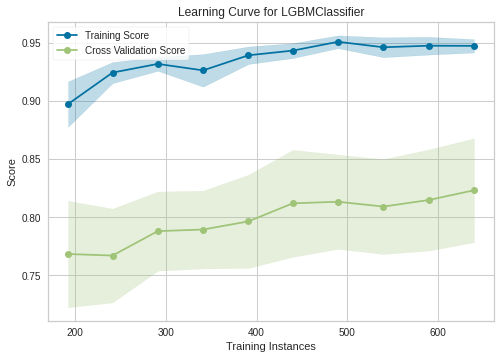

In [21]:
plot_model(estimator = lgbm, plot = 'learning')

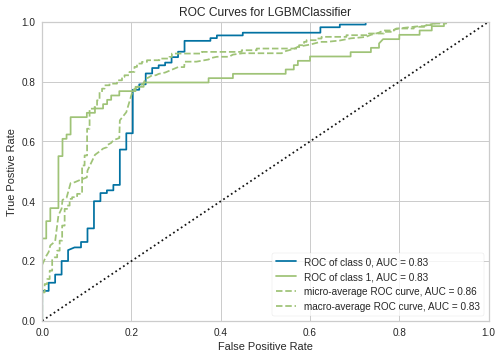

In [22]:
plot_model(estimator = lgbm, plot = 'auc')

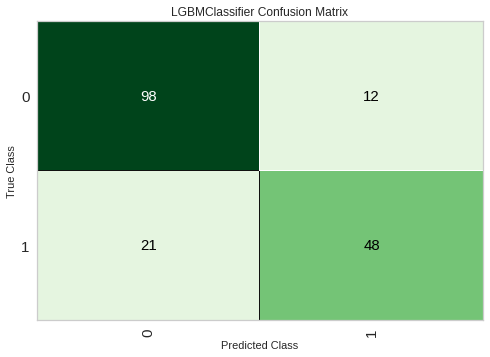

In [23]:
plot_model(estimator = lgbm, plot = 'confusion_matrix')

# **INTERPRET MODEL**
Interpretation of a model based on different metrics can be done using interpret_model function. 

Similar to plot_model function, interpret_model also takes two parameters. One is a trained model object and the other is type of plot as string.

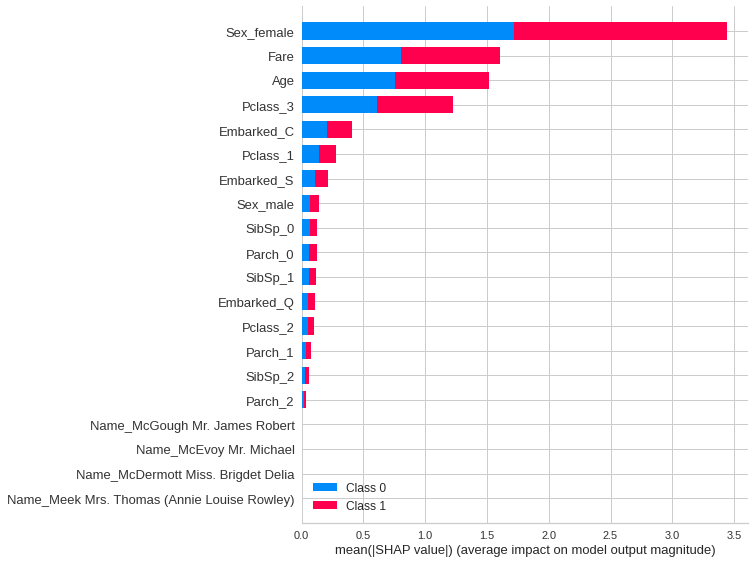

In [24]:
interpret_model(lgbm)

# **MODEL TESTING**
We have successfully built our model and interpreted the results using the above features in PyCaret. Inorder to see how the model works, predictions should be done on either test set or new data. 

**predict_model** will predict on the test data from the pipeline taking the trained model object as parameter.

In [26]:
y_pred = predict_model(CB)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7933,0.8345,0.5797,0.8333,0.6838,0.5375,0.557


# **FINALIZING A MODEL**
finalize_model is a function that allows to train the chosen model for the last time on the entire dataset. final_model takes a trained model object as a parameter.

In [27]:
final_model = finalize_model(CB)

SAVING A MODEL AND EXPERIMENT save_model is a function that saves a model and its entire pipeline as a pickle file. It takes two parameters which are the trained model object and the name to be saved as a string. This saved model can later be used using load_model function.

In [28]:
# Saving a machine learning model
model_saved = save_model(CB, 'CB_01')

# Load the saved model
model_loaded = load_model('CB_01')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded
